In [82]:
import pandas as pd
import numpy as np

In [83]:
Mile_DF = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [84]:
Mile_DF.shape

(96, 2)

In [85]:
Mile_DF.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


MilesMM - This column tells us the miles covered in millions.

In Jan 1963 the total miles covered were - 6827 million miles

### Line Chart

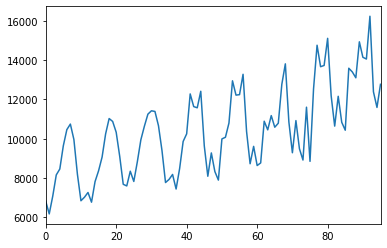

In [86]:
Mile_DF['MilesMM'].plot()

- We can see the positive trend. 
- Overall number of miles are increasing.
- We can see ups and dows at a constant interval of time, whcih indicates that there is some seasonal pattern.

### Trendline

In [87]:
import seaborn as sns

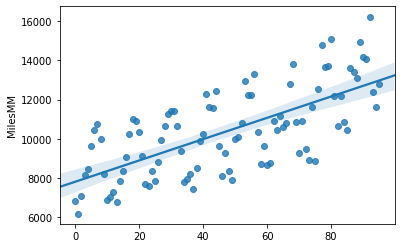

In [88]:
sns.regplot(x= Mile_DF.index.values, y=Mile_DF['MilesMM'])

- We can see the Ups and Downs in this Scatter plot as well.
- The positive slope of the trendline indicates that the number of miles are increasing over time.

### Let's remove the Seasonality from the data

##### To aggregate the data over year level we have to remove the effect of monthly seasonlaity

 ### Date time features

In [89]:
#Create a seperate year column
Mile_DF['year'] = Mile_DF['Month'].dt.year

In [90]:
Mile_DF.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


Create a mean of miles for 12 months for each year

In [91]:
Mile_Mean = Mile_DF.groupby('year')['MilesMM'].mean()

In [92]:
Mile_Mean.head()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
Name: MilesMM, dtype: float64

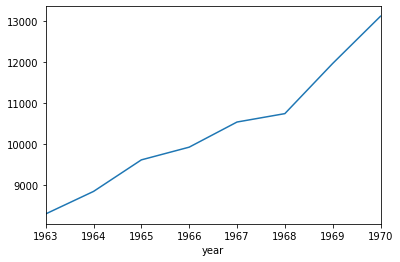

In [93]:
Mile_Mean.plot()

In this chart the seasonality has been removed

### Creating Lag plots

Lag values are important in forecasting because the values we want to forecast are dependent on previous values.

In [94]:
Mile_DF['lag1'] =  Mile_DF['MilesMM'].shift(1)

In [95]:
Mile_DF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


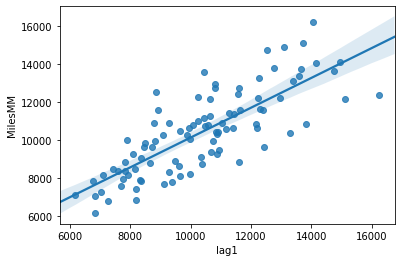

In [96]:
sns.regplot(x=Mile_DF['lag1'], y=Mile_DF['MilesMM'])

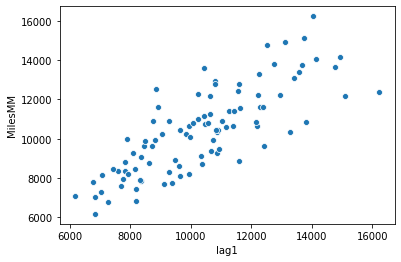

In [97]:
sns.scatterplot(x=Mile_DF['lag1'], y=Mile_DF['MilesMM'])

- We can see that there is some positive correlation between the Lag values and True values.
- If the Lag value is high, Miles value is also high.

#### Simple way to plot the lag_plot directly

In [98]:
from pandas.plotting import lag_plot

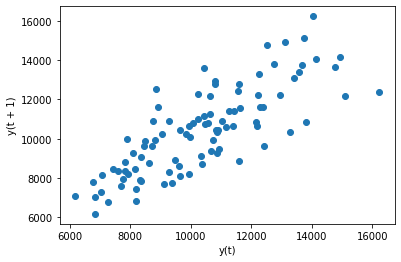

In [99]:
#By default lag_plot will take lag of 1
lag_plot(Mile_DF['MilesMM'])

### Autocorrelation Plots

Creating individual plots with different lag values like lag1, lag2, lag3, lag4 and so on will be a very lenghty and messy process.


###### We can directly get correlation values with all the possible lag values.

In [100]:
from pandas.plotting import autocorrelation_plot

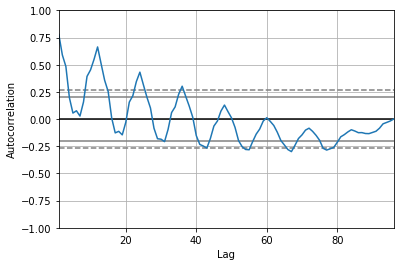

In [101]:
autocorrelation_plot(Mile_DF['MilesMM'])

- Here, we can see that the correlation values are on y axis and lag values on x axis.
- First value is the correlation value between valriable "MilesMM" and lag1 and Second value is the correlation value beteen MilesMM and lag 2. 
* So we have correlation data with upto 90 lag values.

- ###### We can see that there is a high correlation for initial few values (more than 0.50).
- ###### For the first three period the lag values are highly correlated with the 'MilesMM' value
- ###### There is a dip in correlation values with almost every 6 months. This is because of the Seasonality.


# Resampling

###### Resampling means changing the frequency of the available data to match the frequency of the required forecast.
###### Downsamplig -  To decrease the frequency of the samples such as from days to months.
###### Upsampling - To increase the frequency of the samples such as from minutes to seconds.

In [102]:
Mile_DF.drop(['year' ,'lag1'] , axis = 1, inplace = True)

## Downsampling

In [103]:
#Downsampling the Data from Monthly to Quarterly
Quarterly_Miles_DF = Mile_DF.resample('Q', on='Month').mean()

In [104]:
Quarterly_Miles_DF.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [105]:
#Downsampling the Data from Monthly to Yearly
Yearly_Total_Miles_DF = Mile_DF.resample('A', on='Month').sum()

In [106]:
Yearly_Total_Miles_DF.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


## Upsampling

In [107]:
#Upsampling the Data from Monthly to Daily
UpSampled_Miles_DF = Mile_DF.resample('D', on='Month').mean()

In [108]:
UpSampled_Miles_DF.head(32)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


###### Instead of NaN in the values of miles, let's fill these values  to fit a linear line 

In [109]:
Interpolated_Miles_DF = UpSampled_Miles_DF.interpolate(method='linear')

In [110]:
Interpolated_Miles_DF.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


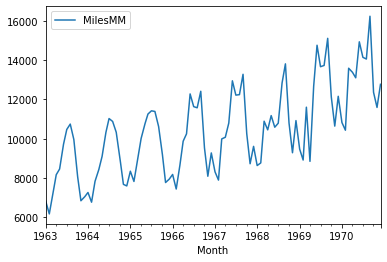

In [111]:
Interpolated_Miles_DF.plot()

### Time Series - Transformation

#### Moving Average Smoothing - Simple Averaging
#### Exponential Smoothing - Weighted Averaging - Larger weights to the latest values and smaller weights to the older ones
#### Moving Average Smoothing and Exponential Smoothing can only be used when there is no trend or seasonality in the series

## Decomposing Time Series

#### Simple way to identify trend and seasonality in the data

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [113]:
miles_decomp_df = Mile_DF

In [114]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [115]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [116]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [117]:
result1 = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

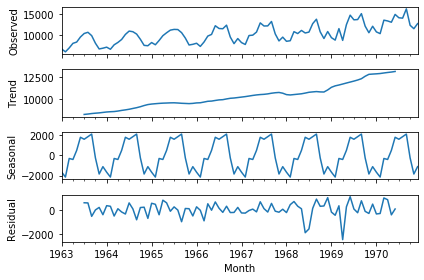

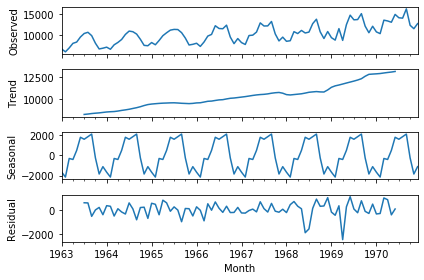

In [118]:
result1.plot()

In [119]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

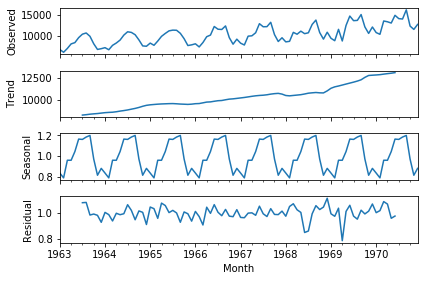

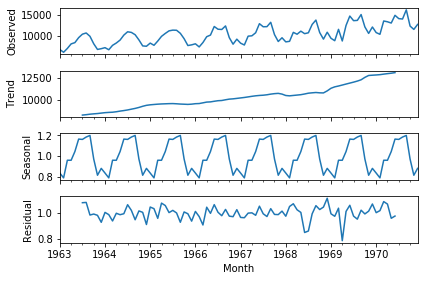

In [120]:
result2.plot()